# Pandas 개요

## 불러오기

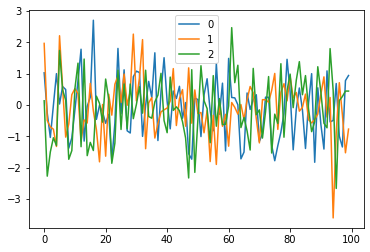

In [56]:
import pandas as pd
import matplotlib.pylab as plt
import numpy as np
df1 = pd.DataFrame(np.random.randn(100, 3))
df1.tail()
df1.plot()
plt.show()


## Series

In [0]:
import numpy as np

pd_series00 = pd.Series(np.random.randn(10))

In [4]:
pd_series00.axes, pd_series00.dtype, pd_series00.empty, pd_series00.ndim, pd_series00.size, pd_series00.values

([RangeIndex(start=0, stop=10, step=1)],
 dtype('float64'),
 False,
 1,
 10,
 array([ 0.21733289,  0.7113629 , -0.16670395, -0.0904417 ,  0.57043444,
         0.63251134, -0.72192904,  1.32050802,  0.49678676,  1.79714228]))

In [5]:
pd_series00.head(3), pd_series00.tail(3)

(0    0.217333
 1    0.711363
 2   -0.166704
 dtype: float64, 7    1.320508
 8    0.496787
 9    1.797142
 dtype: float64)

In [119]:
pd_series01 = pd.Series([1,2,3,4,5],index = ['a','b','c','d','e'])
print(pd_series01[:3], pd_series01['b'], pd_series01[['a','c','d']])

a    1
b    2
c    3
dtype: int64 2 a    1
c    3
d    4
dtype: int64


In [121]:
pd_series01.loc["a":"d"]

a    1
b    2
c    3
d    4
dtype: int64

In [7]:
pd_series01.describe(include='all')

count    5.000000
mean     3.000000
std      1.581139
min      1.000000
25%      2.000000
50%      3.000000
75%      4.000000
max      5.000000
dtype: float64

In [8]:
pd_series01[pd_series01 > 3]

d    4
e    5
dtype: int64

In [9]:
pd_series01[['a','c','d']] = [20,30,40]
pd_series01

a    20
b     2
c    30
d    40
e     5
dtype: int64

In [0]:
del pd_series01['a']

In [11]:
pd_series01.drop(['b','d']) 

c    30
e     5
dtype: int64

In [113]:
pd_series01 = pd.Series([1,2,3,4,5])  # without index
pd_series01[:3], pd_series01[[0]]

(0    1
 1    2
 2    3
 dtype: int64, 0    1
 dtype: int64)

In [115]:
pd_series01[:3] = [9,8,7]
pd_series01

0    9
1    8
2    7
3    4
4    5
dtype: int64

In [117]:
pd_series01.loc[]

IndexingError: ignored

## DataFrame

In [14]:
pd_dataframe01 = pd.DataFrame(pd_series01)
pd_dataframe01

,0
0,9
1,8
2,7
3,4
4,5


In [15]:
pd_dataframe02 = pd.DataFrame([['Alex',10],['Bob',12],['Clarke',13]],columns=['Name','Age'])
pd_dataframe02

,Name,Age
0,Alex,10
1,Bob,12
2,Clarke,13


In [94]:
data = {'Name':['Tom', 'Jack', 'Steve', 'Ricky'],'Age':[28,34,29,42]}
pd_dataframe04 = pd.DataFrame(data, index=['rank1','rank2','rank3','rank4'])
pd_dataframe4 = pd_dataframe04.copy()
# pd_dataframe4 is pd_dataframe04
pd.merge(pd_dataframe04,pd_dataframe4, how='outer')
pd_dataframe04['score'] = pd_dataframe04['Age']+50
pd_dataframe04

,Name,Age,score
rank1,Tom,28,78
rank2,Jack,34,84
rank3,Steve,29,79
rank4,Ricky,42,92


In [83]:
pd_dataframe04.iloc[0:1,2:3]

""
rank1


In [99]:
data01 = {'one' : pd.Series([1, 2, 3], index=['a', 'b', 'c']),
      'two' : pd.Series([1, 2, 3, 4], index=['a', 'c', 'd', 'e'])}

pd_dataframe05 = pd.DataFrame(data01)
pd_dataframe05 ['one']

a    1.0
b    2.0
c    3.0
d    NaN
e    NaN
Name: one, dtype: float64

In [100]:
pd_dataframe06=pd.Series([10,20,30],index=['a','e','f'])
pd_dataframe06

a    10
e    20
f    30
dtype: int64

In [101]:
pd_dataframe05['three']=pd_dataframe06   # No apply 'f' row 
pd_dataframe05

,one,two,three
a,1.0,1.0,10.0
b,2.0,NaN,NaN
c,3.0,2.0,NaN
d,NaN,3.0,NaN
e,NaN,4.0,20.0


In [102]:
pd_dataframe05['four']=pd_dataframe05['two']+pd_dataframe05['three']  # NaN Not Calculate
pd_dataframe06 = pd_dataframe05
pd_dataframe06

,one,two,three,four
a,1.0,1.0,10.0,11.0
b,2.0,NaN,NaN,NaN
c,3.0,2.0,NaN,NaN
d,NaN,3.0,NaN,NaN
e,NaN,4.0,20.0,24.0


In [109]:
pd_dataframe06.loc['b':'c'], type(pd_dataframe06.loc['b':'c'])

(   one  two  three  four
 b  2.0  NaN    NaN   NaN
 c  3.0  2.0    NaN   NaN, pandas.core.frame.DataFrame)

In [112]:
pd_dataframe06.iloc[1:3], type(pd_dataframe06.iloc[1:3])

(   one  two  three  four
 b  2.0  NaN    NaN   NaN
 c  3.0  2.0    NaN   NaN, pandas.core.frame.DataFrame)

In [0]:
pd_dataframe06.drop(['one','two'], axis=1)

In [95]:
data01 = {'one' : pd.Series([1, 2, 3], index=['a', 'b', 'c']),
      'two' : pd.Series([1, 2, 3, 4], index=['a', 'c', 'd', 'e'])}

pd_dataframe05 = pd.DataFrame(data01)
# pd_dataframe05.drop(['c','e'])

,one,two
a,1.0,1.0
b,2.0,NaN
d,NaN,3.0


In [0]:
del pd_dataframe05['one']
pd_dataframe05

In [0]:
pd_dataframe05.pop('two')
pd_dataframe05

In [24]:
pd_dataframe10 = pd.DataFrame(pd_dataframe05)
pd_dataframe10.loc['b':'c'], type(pd_dataframe10.loc['b'])

(   three  four
 b    NaN   NaN
 c    NaN   NaN, pandas.core.series.Series)

In [25]:
pd_dataframe10[['four']][1:4]

,four
b,NaN
c,NaN
d,NaN


In [26]:
pd_dataframe10.loc['a':'b','one':'four'], type(pd_dataframe10.loc['a':'b','one':'four'])

(   four
 a  11.0
 b   NaN, pandas.core.frame.DataFrame)

In [27]:
pd_dataframe10.iloc[1:4]  # integer location

,three,four
b,NaN,NaN
c,NaN,NaN
d,NaN,NaN


In [28]:
pd_dataframe10[['three','four']].iloc[1:4]

,three,four
b,NaN,NaN
c,NaN,NaN
d,NaN,NaN


In [0]:
pd_dataframe11 = pd.DataFrame([[5, 6], [7, 8]], columns=['one', 'two'])
pd_dataframe12 = pd_dataframe10.append(pd_dataframe11)

In [30]:
pd_dataframe12.drop('c', axis=0)

,three,four,one,two
a,10.0,11.0,NaN,NaN
b,NaN,NaN,NaN,NaN
d,NaN,NaN,NaN,NaN
e,20.0,24.0,NaN,NaN
0,NaN,NaN,5.0,6.0
1,NaN,NaN,7.0,8.0


In [31]:
pd_dataframe12.T, pd_dataframe12.axes, pd_dataframe12.dtypes, pd_dataframe12.empty, pd_dataframe12.ndim, pd_dataframe12.size, pd_dataframe12.shape, pd_dataframe12.values

(          a   b   c   d     e    0    1
 three  10.0 NaN NaN NaN  20.0  NaN  NaN
 four   11.0 NaN NaN NaN  24.0  NaN  NaN
 one     NaN NaN NaN NaN   NaN  5.0  7.0
 two     NaN NaN NaN NaN   NaN  6.0  8.0,
 [Index(['a', 'b', 'c', 'd', 'e', 0, 1], dtype='object'),
  Index(['three', 'four', 'one', 'two'], dtype='object')],
 three    float64
 four     float64
 one      float64
 two      float64
 dtype: object,
 False,
 2,
 28,
 (7, 4),
 array([[10., 11., nan, nan],
        [nan, nan, nan, nan],
        [nan, nan, nan, nan],
        [nan, nan, nan, nan],
        [20., 24., nan, nan],
        [nan, nan,  5.,  6.],
        [nan, nan,  7.,  8.]]))

In [0]:
pd_dataframe12.iloc[2:0] = ''

In [33]:
pd_dataframe12.tail()

,three,four,one,two
c,NaN,NaN,NaN,NaN
d,NaN,NaN,NaN,NaN
e,20,24,NaN,NaN
0,NaN,NaN,5,6
1,NaN,NaN,7,8


In [34]:
data30 = {'Name':pd.Series(['Tom','James','Ricky','Vin','Steve','Smith','Jack',
   'Lee','David','Gasper','Betina','Andres']),
   'Age':pd.Series([25,26,25,23,30,29,23,34,40,30,51,46]),
   'Rating':pd.Series([4.23,3.24,3.98,2.56,3.20,4.6,3.8,3.78,2.98,4.80,4.10,3.65])
}

#Create a DataFrame
pd_dataframe13 = pd.DataFrame(data30)
pd_dataframe13.describe(include=['object'])

,Name
count,12
unique,12
top,Gasper
freq,1


In [35]:
pd_dataframe13.describe(include='all')

,Name,Age,Rating
count,12,12.000000,12.000000
unique,12,NaN,NaN
top,Gasper,NaN,NaN
freq,1,NaN,NaN
mean,NaN,31.833333,3.743333
std,NaN,9.232682,0.661628
min,NaN,23.000000,2.560000
25%,NaN,25.000000,3.230000
50%,NaN,29.500000,3.790000
75%,NaN,35.500000,4.132500


In [36]:
p_list = [[2013, 2014, 2015, 2016, 2017], 
        ["Choi", "Choi", "Choi", "Kim", "Park"], 
        [1.5, 1.7, 3.6, 2.4, 2.9]]
df_list = np.array(p_list) 
df_list = df_list.T
df_list = np.insert(df_list,len(df_list[0]),np.arange(0,len(df_list)),axis=1)
df_list

array([['2013', 'Choi', '1.5', '0'],
       ['2014', 'Choi', '1.7', '1'],
       ['2015', 'Choi', '3.6', '2'],
       ['2016', 'Kim', '2.4', '3'],
       ['2017', 'Park', '2.9', '4']], dtype='<U21')

In [37]:
df = pd.DataFrame(df_list, columns=["year", "name", "points", "penalty"],
                                  index=(["one", "two", "three", "four", "five"]))
df

,year,name,points,penalty
one,2013,Choi,1.5,0
two,2014,Choi,1.7,1
three,2015,Choi,3.6,2
four,2016,Kim,2.4,3
five,2017,Park,2.9,4


In [0]:
data = {'Name':['Tom', 'Jack', 'Steve', 'Ricky'],'Age':[28,34,29,42]}
df01 = pd.DataFrame(data, index=['rank1','rank2','rank3','rank4'])

In [39]:
df01.index, df01.values, df01.columns, df01.dtypes

(Index(['rank1', 'rank2', 'rank3', 'rank4'], dtype='object'),
 array([['Tom', 28],
        ['Jack', 34],
        ['Steve', 29],
        ['Ricky', 42]], dtype=object),
 Index(['Name', 'Age'], dtype='object'),
 Name    object
 Age      int64
 dtype: object)

In [54]:
data01 = {'one' : {'a':1, 'b':2, 'c':3},
      'two' : {'a':1, 'b':2, 'c':3, 'e':5}}
pd.DataFrame(data01)
# data01 = {'one' : pd.Series([1, 2, 3], index=['a', 'b', 'c']),
#       'two' : pd.Series([1, 2, 3, 4], index=['a', 'c', 'd', 'e'])}


,one,two
a,1.0,1
b,2.0,2
c,3.0,3
e,NaN,5


In [174]:
data = {
'name': ["Choi", "Choi", "Choi", "Kim", "Park"], 
'year': [2013, 2014, 2015, 2016, 2017], 
'points': [1.5, 1.7, 3.6, 2.4, 2.9]
} 
# DataFrame을 만들면서 columns와 index를 설정
df = pd.DataFrame(data, columns=["year", "name", "points", "penalty"],
                                  index=(["one", "two", "three", "four", "five"]))
df.shape

(5, 4)

In [175]:
df.loc['two':'four',:]

,year,name,points,penalty
two,2014,Choi,1.7,NaN
three,2015,Choi,3.6,NaN
four,2016,Kim,2.4,NaN


In [176]:
df.loc[:,"name":"penalty"]

,name,points,penalty
one,Choi,1.5,NaN
two,Choi,1.7,NaN
three,Choi,3.6,NaN
four,Kim,2.4,NaN
five,Park,2.9,NaN


In [177]:
df.drop(df.loc[:,"name":"penalty"],axis=1)

,year
one,2013
two,2014
three,2015
four,2016
five,2017


In [190]:
df

,year,name,points,penalty,score
one,2013.0,Choi,1.5,NaN,1.5
two,2014.0,Choi,1.7,NaN,1.7
three,2015.0,Choi,3.6,NaN,3.6
four,2016.0,Kim,2.4,NaN,2.4
five,2017.0,Park,2.9,NaN,2.9
six,NaN,NaN,NaN,NaN,NaN


In [192]:
df.loc['six',:] = [2017,'Park',2.9,3,4]
df

,year,name,points,penalty,score
one,2013.0,Choi,1.5,NaN,1.5
two,2014.0,Choi,1.7,NaN,1.7
three,2015.0,Choi,3.6,NaN,3.6
four,2016.0,Kim,2.4,NaN,2.4
five,2017.0,Park,2.9,NaN,2.9
six,2017.0,Park,2.9,3,4.0


In [197]:
df.drop(['four','five'],axis=0)

,year,name,points,penalty,score
one,2013.0,Choi,1.5,NaN,1.5
two,2014.0,Choi,1.7,NaN,1.7
three,2015.0,Choi,3.6,NaN,3.6
six,2017.0,Park,2.9,3,4.0


In [186]:
df.iloc[-1:,:]

,year,name,points,penalty,score
five,2017,Park,2.9,NaN,2.9


In [134]:
df.iloc[0:3,1:3]

,name,points
one,Choi,1.5
two,Choi,1.7
three,Choi,3.6


In [154]:
df["year"] > 2014 

one      False
two      False
three     True
four      True
five      True
Name: year, dtype: bool

In [146]:
df.loc[df['name'] == "Choi", :]

,year,name,points,penalty
one,2013,Choi,1.5,NaN
two,2014,Choi,1.7,NaN
three,2015,Choi,3.6,NaN


In [204]:
df.loc[df['name'] == "Choi", ['year','points','penalty']].index

Index(['one', 'two', 'three'], dtype='object')

In [206]:
df.drop(df.loc[df['name'] == "Choi"].index, axis=0)

,year,name,points,penalty,score
four,2016.0,Kim,2.4,NaN,2.4
five,2017.0,Park,2.9,NaN,2.9
six,2017.0,Park,2.9,3,4.0


## Panel

In [40]:
import pandas as pd
import numpy as np

data = {'Item1' : pd.DataFrame(np.random.randn(4, 3)), 
   'Item2' : pd.DataFrame(np.random.randn(4, 2))}
p = pd.Panel(data)
p

TypeError: ignored

##Row or Column Wise Function

In [0]:
import numpy as np

pd_dataframe20 = pd.DataFrame(np.random.randn(5,3),columns=['col1','col2','col3'])
pd_dataframe21 = pd_dataframe20.copy()
pd_dataframe22 = pd_dataframe20.copy()
pd_dataframe23 = pd_dataframe20.copy()
pd_dataframe20

In [0]:
pd_dataframe20['mean'] = pd_dataframe20.apply(np.mean)

In [0]:
pd_dataframe20[['mean', 'col1']]

In [0]:
pd_dataframe21.apply(lambda x: x.max() - x.min())
# pd_dataframe21.apply(np.mean)

In [0]:
pd_dataframe23

In [0]:
pd_dataframe23['col1'] = pd_dataframe23['col1'].map(lambda x:x*100)
# pd_dataframe23.apply(np.mean)

In [0]:
type(pd_dataframe23['col1'])

In [0]:
pd_dataframe23

In [0]:
pd_dataframe24 = pd_dataframe23
pd_dataframe24 is pd_dataframe23

In [0]:
pd_dataframe25 = pd_dataframe23.copy()
pd_dataframe25 is pd_dataframe23

In [0]:
pd_dataframe23.describe().loc['mean']

## reindex

In [0]:
N=20
df = pd.DataFrame({
   'A': pd.date_range(start='2016-01-01',periods=N,freq='D'),
   'x': np.linspace(0,stop=N-1,num=N),
   'y': np.random.rand(N),
   'C': np.random.choice(['Low','Medium','High'],N).tolist(),
   'D': np.random.normal(100, 10, size=(N)).tolist()
})
df


In [0]:
#reindex the DataFrame
df_reindexed = df.reindex(index=[0,2,5], columns=['A', 'C', 'B'])
df_reindexed

In [0]:
df1 = pd.DataFrame(np.random.randn(10,3),columns=['col1','col2','col3'])
df2 = pd.DataFrame(np.random.randn(7,3),columns=['col1','col2','col4'])

df1 = df1.reindex_like(df2)
df1

In [0]:
df = pd.DataFrame(np.random.randn(3, 3), index=['a', 'c', 'e'],columns=['one',
'two', 'three'])
df = df.reindex(['a', 'b', 'c'])
df['two'] = df['two'].fillna(3)
df

## Iterating

In [0]:
df = pd.DataFrame(np.random.randn(4,3),columns = ['col1','col2','col3'])
print(df)
for index, row in df.iterrows():
  row = row + 10
  print(index,row)
df  

## sort

In [0]:
unsorted_df = pd.DataFrame(np.random.randn(10,2),index=[1,4,6,2,3,5,9,8,0,7],columns = ['col2','col1'])

unsorted_df.sort_index(ascending=False)


In [0]:
unsorted_df.sort_values(by=['col1','col2'])

## Working with Text Data 

In [0]:
pd_series10 = pd.Series(['Tom', ' William Rick ', 'John', 'Alber@t', np.nan, '1234',212])

d_series10 = pd.Series(['Tom', ' William Rick ', 'John', 'Alber@t', np.nan, '1234',212])


In [122]:
pd_df11 = pd.DataFrame([[5, 6], [7, 8]], columns=['one', 'two'])
pd_df12 = pd_df10.append(pd_df11)
# pd_df12.drop('c', axis=0)

NameError: ignored

In [0]:
pd_series10.str.strip()

#Data Cleansing

##Replace NaN with a Scalar Value

In [0]:
import pandas as pd
import numpy as np
df = pd.DataFrame(np.random.randn(3, 3), index=['a', 'c', 'e'],columns=['one',
'two', 'three'])
df = df.reindex(['a', 'b', 'c'])
df = df.fillna(0)
df

In [0]:
df = pd.DataFrame(np.random.randn(3, 3), index=['a', 'c', 'e'],columns=['one',
'two', 'three'])
df = df.reindex(['a', 'b', 'c'])
df['one'] = df['one'].fillna(2)
df

##Drop Missing Values

In [0]:
df = pd.DataFrame(np.random.randn(5, 3), index=['a', 'c', 'e', 'f',
'h'],columns=['one', 'two', 'three'])

df = df.reindex(['a', 'b', 'c', 'd', 'e', 'f', 'g', 'h'])
df

In [0]:
df.dropna()

##Replace Missing (or) Generic Values

In [0]:
df = pd.DataFrame({'one':[10,20,30,40,50,2000],
'two':[1000,0,30,40,50,60]})
df

In [0]:
df.replace({1000:10,2000:60})

#Processing CSV Data

In [0]:
data = pd.read_csv('./input_csv.csv')
data

In [0]:
data.to_csv (r'./output_csv.csv', index = False, header=True)

In [0]:
data = pd.read_csv('./sample_data/california_housing_train.csv')
data

## Processing JSON Data

In [61]:
data = pd.read_json('./input.json')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8 entries, 0 to 7
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   ID         8 non-null      int64  
 1   Name       8 non-null      object 
 2   Salary     8 non-null      float64
 3   StartDate  8 non-null      object 
 4   Dept       8 non-null      object 
dtypes: float64(1), int64(1), object(3)
memory usage: 448.0+ bytes


In [0]:
data.info()

In [0]:
data.describe(include='all')

In [0]:
data.to_json(r'./output.json')

##Processing XLS Data

In [0]:
data = pd.read_excel('./input.xlsx')
data

In [0]:
data.to_csv (r'./output.xlsx', index = True, header=True)

### Reading Multiple Excel Sheets

In [0]:
with pd.ExcelFile('./input.xlsx') as xls:
    df1 = pd.read_excel(xls, 'Sheet1')
    df2 = pd.read_excel(xls, 'Sheet2')
df2    

In [0]:
df1

##Relational Databases

In [0]:
!pip install sqlalchemy

In [0]:
from sqlalchemy import create_engine
import pandas as pd

data = pd.read_csv('./input.csv')

# Create the db engine
engine = create_engine('sqlite:///:memory:')

# Store the dataframe as a table
data.to_sql('data_table', engine)

In [0]:
# Query 1 on the relational table
res1 = pd.read_sql_query('SELECT * FROM data_table', engine)
res1

In [0]:
res2 = pd.read_sql_query('SELECT dept,sum(salary) FROM data_table group by dept', engine)
res2

##NoSQL Databases
참조 : https://www.tutorialspoint.com/python_data_science/python_nosql_databases.htm

In [0]:
!pip install pymongo

##Processing Unstructured Data

In [0]:
from collections import Counter

with open(r'./input.txt') as f:
  p = Counter(f.read().split())
  print('-'*20)
  print(p)
# pd.DataFrame(p)  

In [62]:
from collections import Counter

with open(r'./sample_data/README.md') as f:
  p = Counter(f.read().split())
  print('-'*20)
  print(p)
# pd.DataFrame(p)  

--------------------
Counter({'is': 4, 'a': 3, '*': 3, 'the': 3, 'sample': 2, 'at:': 2, 'of': 2, 'described': 2, 'copy': 2, 'was': 2, 'in': 2, 'This': 1, 'directory': 1, 'includes': 1, 'few': 1, 'datasets': 1, 'to': 1, 'get': 1, 'you': 1, 'started.': 1, '`california_housing_data*.csv`': 1, 'California': 1, 'housing': 1, 'data': 1, 'from': 1, '1990': 1, 'US': 1, 'Census;': 1, 'more': 1, 'information': 1, 'available': 1, 'https://developers.google.com/machine-learning/crash-course/california-housing-data-description': 1, '`mnist_*.csv`': 1, 'small': 1, '[MNIST': 1, 'database](https://en.wikipedia.org/wiki/MNIST_database),': 1, 'which': 1, 'http://yann.lecun.com/exdb/mnist/': 1, '`anscombe.json`': 1, 'contains': 1, "[Anscombe's": 1, 'quartet](https://en.wikipedia.org/wiki/Anscombe%27s_quartet);': 1, 'it': 1, 'originally': 1, 'Anscombe,': 1, 'F.': 1, 'J.': 1, '(1973).': 1, "'Graphs": 1, 'Statistical': 1, "Analysis'.": 1, 'American': 1, 'Statistician.': 1, '27': 1, '(1):': 1, '17-21.': 1, '

#Data Check

##Data Wrangling

In [0]:
import pandas as pd
left = pd.DataFrame({
         'id':[1,2,3,4,5],
         'Name': ['Alex', 'Amy', 'Allen', 'Alice', 'Ayoung'],
         'subject_id':['sub1','sub2','sub4','sub6','sub5']})
right = pd.DataFrame(
         {'id':[1,2,3,4,5],
         'Name': ['Billy', 'Brian', 'Bran', 'Bryce', 'Betty'],
         'subject_id':['sub2','sub4','sub3','sub6','sub5']})

In [0]:
pd.merge(left, right, how='inner', on=None, left_on=None, right_on=None,
left_index=False, right_index=False, sort=True)

###Grouping Data

In [0]:
import pandas as pd

ipl_data = {'Team': ['Riders', 'Riders', 'Devils', 'Devils', 'Kings',
         'kings', 'Kings', 'Kings', 'Riders', 'Royals', 'Royals', 'Riders'],
         'Rank': [1, 2, 2, 3, 3,4 ,1 ,1,2 , 4,1,2],
         'Year': [2014,2015,2014,2015,2014,2015,2016,2017,2016,2014,2015,2017],
         'Points':[876,789,863,673,741,812,756,788,694,701,804,690]}
df = pd.DataFrame(ipl_data)

grouped = df.groupby('Year')
grouped.describe()

In [0]:
grouped.get_group(2014)

### Concatenating Data

In [0]:
one = pd.DataFrame({
         'Name01': ['Alex', 'Amy', 'Allen', 'Alice', 'Ayoung'],
         'subject_id':['sub1','sub2','sub4','sub6','sub5'],
         'Marks_scored':[98,90,87,69,78]},
         index=[1,2,3,4,5])
two = pd.DataFrame({
         'Name': ['Billy', 'Brian', 'Bran', 'Bryce', 'Betty'],
         'subject_id':['sub2','sub4','sub3','sub6','sub5'],
         'Marks_scored':[89,80,79,97,88]},
         index=[1,2,3,4,5])
pd.concat([one,two])

##Data Aggregation
https://www.tutorialspoint.com/python_data_science/python_data_aggregation.htm

## wget

In [198]:
!pip install wget

  Created wheel for wget: filename=wget-3.2-cp36-none-any.whl size=9682 sha256=d77e50bc5915268bd6f83a236a373f9985d8064fb021a5ef4ed9e197a100ffdc
  Stored in directory: /root/.cache/pip/wheels/40/15/30/7d8f7cea2902b4db79e3fea550d7d7b85ecb27ef992b618f3f
Successfully built wget


In [202]:
import wget
url = 'https://www.kaggle.com/....csv'
filename = wget.download(url)
filename

'GQf0y8ebHO0C4JXscPPp%2Fversions%2FXkNkvXwqPPVG0Qt3MtQT%2Ffiles%2Ftest.csv'

#Statistical Data Analysis

##Measuring Central Tendency

In [0]:
#Create a Dictionary of series
d = {'Name':pd.Series(['Tom','James','Ricky','Vin','Steve','Smith','Jack',
   'Lee','Chanchal','Gasper','Naviya','Andres']),
   'Age':pd.Series([25,26,25,23,30,29,23,34,40,30,30,46]),
   'Rating':pd.Series([4.23,3.24,3.98,2.56,3.20,4.6,3.8,3.8,2.98,3.98,4.10,3.65])}

#Create a DataFrame
df = pd.DataFrame(d)
df.mean(), df.median(), df.mode()

In [0]:
df.mode()